In [22]:
from skimage.data import shepp_logan_phantom
from skimage.transform import radon, rescale, iradon

import scipy

import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib

img = nib.load('1010_brain_mr_02.nii')

image = np.array(img.dataobj)
image = np.squeeze(image)

In [ ]:
image2 = np.zeros((96,96,192))
for i in range(np.shape(image)[2]):
    print(i)
    image_i = rescale(image[:,:,i], scale=.5, mode='reflect')
    theta = np.linspace(0., 180., max(image_i.shape), endpoint=False)
    sinogram = radon(image_i, theta=theta)

    # Suppose we lost every even degree's sample:
    #for j in range(160):
     #   if j%2==0:
      #      sinogram[:,j] = 0

    #sinogram[:,6:30] = 0
    #sinogram[:,130:150] = 0

    # Get rid of frequency detail because we ONLY care about the boundary:
    sinogram[sinogram != 0] = 1
    
    # Smooth the image
   # sinogram = scipy.ndimage.gaussian_filter(sinogram, 1)

    # Threshold so it is still a mask:
    #sinogram[sinogram < 0.5] = 0
    #sinogram[sinogram >= 0.5] = 1

    reconstruction_fbp = iradon(sinogram, theta=theta, filter_name='ramp')
    image2[:,:,i] = reconstruction_fbp
    
nib.save(nib.Nifti1Image(image2,np.eye(4)),"output.nii.gz")


#image = rescale(image, scale=0.4, mode='reflect', channel_axis=None)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154


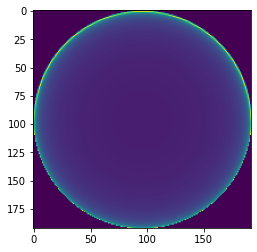

In [29]:

plt.imshow(image2[:,:,70])


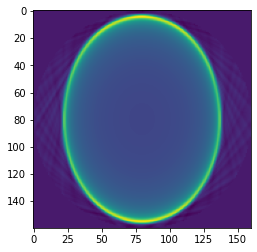

In [8]:
reconstruction_fbp = iradon(sinogram, theta=theta, filter_name='ramp')

plt.imshow(reconstruction_fbp)